In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt


**1. Generacion de datos de serie de tiempo sintetica**

In [15]:
#generar datos para una serie de tiempo sintetica
np.random.seed(0) #Fijar senilla para reproducibilidad
n_samples = 200 # numero de puntos de datos en la serie de tiempo
t = np.arange(n_samples) # valores de tiempo

#crear una serie de tiempo sintetica (en este caso creciente)
time_series = 0.1*t +np.random.randn(n_samples)




**2. Division de datos:**

los datos de serie de tiempo se dividen en conjunto de entrenamiento y prueba con 
un 80% de los datos destinados al entrenamiento y el 20% restante de prueba


In [16]:
train_size = int(len(time_series) * 0.80) #tamano del conjunto de entrenamiento
train_data, test_data = time_series[:train_size],time_series[:train_size]


**Visualizacion de la serie de tiempo:**
Se grafica la serie de tiempo sintetica para visualizar los datos.

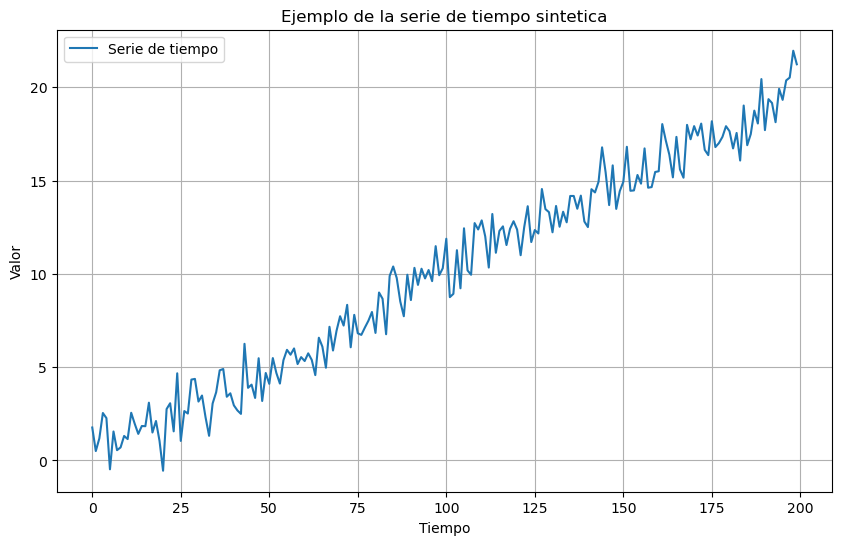

In [17]:
plt.figure(figsize=(10,6))
plt.plot(t, time_series, label="Serie de tiempo")
plt.title("Ejemplo de la serie de tiempo sintetica")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

**Preparacion de datos para LSTM**
Se define una funcion llamada Create dataset  que crea secuencias de datos de entrada y salida a partir de la serie de tiempo
 original , estas secuencias se utilizaran para entrenar el modelo LSTM


In [18]:
def create_dataset(data, seq_legth):
    X, y = [],[]
    for i in range(len(data) - seq_legth):
        X.append(data[i:i+seq_legth])
        y.append(data[i+ seq_legth])
    return np.array(X), np.array(y)

#definimos e; numero de pasos de tiempo para la serie temporal
seq_length = 16

#creamos conjuntos de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)



**5. Construccion del modelo LSTM**
Se cre un modelo secuencialen keras y se agregan capasLSTM con 32 unidades cada una, utilizando la activacion ReLU. se anade una capa densa para la salida.


In [19]:
model = Sequential()
model.add(LSTM(32, 
               activation='relu',
               input_shape=(seq_length,1),
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

c:\Users\julig\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**6. Compilacion del modelo:**
el modelo se compila utilizando el optimizador Adam y la funcion de perdida de error cuadraticop (MSE)


In [20]:
model.compile(optimizer='adam',loss='mse')

**7. Entrenamineto del modelo**


In [21]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 62.2637
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.1766 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1746 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4147 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9696
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0699 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9351 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6751 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3581 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4085 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1498 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1531 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0012 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0669 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1699 
Epoch 16/100
5/5 

In [22]:
#8 Evalucion del modelo
evaluacion = model.evaluate(X_test,y_test)
print(evaluacion)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8812  
0.8963707685470581


In [23]:
#prediccion
#Se realizan las prediciones utilizando el modelo entrenado en los datos de prueba
print("y_test \n", y_test)
y_pred = model.predict(X_test)
print("y_pred: \n", y_pred)


y_test 
 [ 3.09407907  1.49484174  2.1130677   1.04590426 -0.55298982  2.7536186
  3.0644362   1.55783498  4.66975462  1.04563433  2.64575852  2.51281615
  4.33277921  4.36935877  3.15494743  3.47816252  2.31221425  1.31920353
  3.05208785  3.65634897  4.83029068  4.90237985  3.41267318  3.59769725
  2.95144703  2.67998206  2.49372981  6.2507754   3.89034782  4.0619257
  3.34720464  5.47749036  3.18610215  4.68725972  4.10453344  5.4869025
  4.68919486  4.11936782  5.37181777  5.92833187  5.66651722  6.0024719
  5.16567791  5.53725883  5.32753955  5.74044684  5.38685372  4.5737174
  6.57742614  6.09821906  4.96980165  7.16278226  5.89270164  6.9519454
  7.72909056  7.22898291  8.33940068  6.06517418  7.80234164  6.81518991
  6.72920285  7.12115034  7.48844747  7.95616534  6.83485016  9.00082649
  8.66566244  6.76375631  9.88825219 10.39588918  9.77877957  8.52007516
  7.72924738  9.95445173  8.59682305 10.32244507  9.40827498 10.27663904
  9.7563664  10.20657317  9.61050002 11.48587049

In [24]:
#10 visualizacion de las predicciones
#se grafican los datos de peueba y_test junto con las prediciones y_pred para conprarr elrendimineto 
#  del modelo las 2 series nde tiempo se visualizan en elmismo grafico para facilitar la comjjparacion

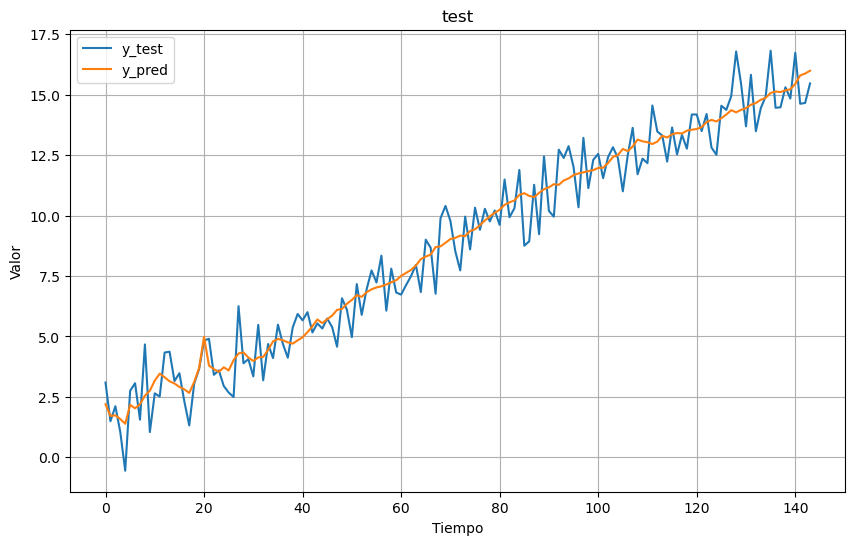

In [25]:
#Graficar de la data de test vs pronosdtico la serie de tiempo 
plt.figure(figsize=(10,6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.title('test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()